 BITCOIN PREDICTION 2022

Deliver 1 - Trying Different Models

In [9]:
# Import Libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import time
import datetime
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [46]:
pip install psycopg2

In [47]:
import psycopg2
import pandas as pd
conn = psycopg2.connect(database="CRYPTO",
                        user='postgres', password='WelcomE01', 
                        host='127.0.0.1', port='5432'
)
  
conn.autocommit = True
cursor = conn.cursor()
sql = '''CREATE TABLE CRYPO_DATA_FEED (
TimeStamp	bigint NOT NULL,
Open  		NUMERIC(8,2),
High 		NUMERIC(8,2),
Low	 		NUMERIC(8,2),
Close		NUMERIC(8,2),
Volume_BTC Float,
Volume_Crrency Float,
Weightted_Price float,
	PRIMARY KEY (TimeStamp)
);'''
cursor.execute(sql)
csv_file_name = 'bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv'

sql = "COPY CRYPO_DATA_FEED FROM STDIN DELIMITER ',' CSV HEADER"

cursor.copy_expert(sql, open(csv_file_name, "r"))

OperationalError: connection to server at "127.0.0.1", port 5432 failed: Connection refused (0x0000274D/10061)
	Is the server running on that host and accepting TCP/IP connections?


In [ ]:
Bit_df = pd.read_sql("select * from CRYPO_DATA_FEED", conn);
Bit_df.head()

In [10]:
# Import Data
#Bit_df = pd.read_csv("C:/Users/v-ansi20/Desktop/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv")
# show the first 5 rows
#Bit_df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
Bit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4857377 entries, 0 to 4857376
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Timestamp          int64  
 1   Open               float64
 2   High               float64
 3   Low                float64
 4   Close              float64
 5   Volume_(BTC)       float64
 6   Volume_(Currency)  float64
 7   Weighted_Price     float64
dtypes: float64(7), int64(1)
memory usage: 296.5 MB


In [12]:
#Drop NaNs from Dataset. 
Bit_df.dropna(inplace=True)
# show the first 5 rows
Bit_df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
478,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
547,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
548,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
1224,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000


In [13]:
Bit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3613769 entries, 0 to 4857376
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Timestamp          int64  
 1   Open               float64
 2   High               float64
 3   Low                float64
 4   Close              float64
 5   Volume_(BTC)       float64
 6   Volume_(Currency)  float64
 7   Weighted_Price     float64
dtypes: float64(7), int64(1)
memory usage: 248.1 MB


In [14]:
# Clean DataFrame for Prediction utilization. 
# Remove Volume Currency from DF
Bit_df.drop(['Volume_(Currency)','Volume_(BTC)'],1,inplace=True)
# show the first 5 rows
Bit_df.head()

,Timestamp,Open,High,Low,Close,Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,4.390000
478,1325346600,4.39,4.39,4.39,4.39,4.390000
547,1325350740,4.50,4.57,4.50,4.57,4.526411
548,1325350800,4.58,4.58,4.58,4.58,4.580000
1224,1325391360,4.58,4.58,4.58,4.58,4.580000


In [15]:
# Rename Timestamp and Weighted_Price
Bit_df.rename(columns = {'Timestamp':'Last Update', 'Weighted_Price':'Weighted Price'}, inplace = True)
# show the first 5 rows
Bit_df.head()

,Last Update,Open,High,Low,Close,Weighted Price
0,1325317920,4.39,4.39,4.39,4.39,4.390000
478,1325346600,4.39,4.39,4.39,4.39,4.390000
547,1325350740,4.50,4.57,4.50,4.57,4.526411
548,1325350800,4.58,4.58,4.58,4.58,4.580000
1224,1325391360,4.58,4.58,4.58,4.58,4.580000


In [18]:
# Convert Timestamp into TimeZone (ET)
Bit_df['Last Update'] = (pd.to_datetime(Bit_df['Last Update'], unit='s')
                     .dt.tz_localize('est')
                     .dt.tz_convert('America/New_York'))
# show the first 5 rows
Bit_df.head()

,Last Update,Open,High,Low,Close,Weighted Price
0,2011-12-31 07:52:00-05:00,4.39,4.39,4.39,4.39,4.390000
478,2011-12-31 15:50:00-05:00,4.39,4.39,4.39,4.39,4.390000
547,2011-12-31 16:59:00-05:00,4.50,4.57,4.50,4.57,4.526411
548,2011-12-31 17:00:00-05:00,4.58,4.58,4.58,4.58,4.580000
1224,2012-01-01 04:16:00-05:00,4.58,4.58,4.58,4.58,4.580000


In [19]:
# Clean Last Update into ms.
Bit_df['Last Update'] = Bit_df['Last Update'].values.astype(dtype='datetime64[ms]')
# show the first 5 rows
Bit_df.head()

,Last Update,Open,High,Low,Close,Weighted Price
0,2011-12-31 12:52:00,4.39,4.39,4.39,4.39,4.390000
478,2011-12-31 20:50:00,4.39,4.39,4.39,4.39,4.390000
547,2011-12-31 21:59:00,4.50,4.57,4.50,4.57,4.526411
548,2011-12-31 22:00:00,4.58,4.58,4.58,4.58,4.580000
1224,2012-01-01 09:16:00,4.58,4.58,4.58,4.58,4.580000


In [20]:
# Esport Clean DF into CSV
#Bit_df.to_csv (r'C:/Users/v-ansi20/Desktop/Bitcoin_2011-2020_Clean.csv', index = False, header=True)

In [21]:
# Let's create a new dataframe to use for our prediction
Bitcoin_df = Bit_df.copy(deep=True)
Bitcoin_df.head()

,Last Update,Open,High,Low,Close,Weighted Price
0,2011-12-31 12:52:00,4.39,4.39,4.39,4.39,4.390000
478,2011-12-31 20:50:00,4.39,4.39,4.39,4.39,4.390000
547,2011-12-31 21:59:00,4.50,4.57,4.50,4.57,4.526411
548,2011-12-31 22:00:00,4.58,4.58,4.58,4.58,4.580000
1224,2012-01-01 09:16:00,4.58,4.58,4.58,4.58,4.580000


In [22]:
Bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3613769 entries, 0 to 4857376
Data columns (total 6 columns):
 #   Column          Dtype         
---  ------          -----         
 0   Last Update     datetime64[ns]
 1   Open            float64       
 2   High            float64       
 3   Low             float64       
 4   Close           float64       
 5   Weighted Price  float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 193.0 MB


### Let's use 2021 Bitcoin Data only.

In [24]:
#Let's filter new DataFrame for 2021 year/data only. 
Bitcoin2021_df = Bitcoin_df[(Bitcoin_df["Last Update"] >= '2021-01-01')]
Bitcoin2021_df.head()

,Last Update,Open,High,Low,Close,Weighted Price
4728916,2021-01-01 00:00:00,28912.47,28940.00,28896.36,28897.20,28912.819700
4728917,2021-01-01 00:01:00,28908.84,28928.51,28863.27,28863.27,28882.997101
4728918,2021-01-01 00:02:00,28852.26,28861.48,28812.60,28829.36,28838.675174
4728919,2021-01-01 00:03:00,28810.63,28817.79,28790.85,28807.63,28805.717457
4728920,2021-01-01 00:04:00,28805.63,28808.51,28776.17,28807.69,28799.372080


In [25]:
Bitcoin2021_df.tail()

,Last Update,Open,High,Low,Close,Weighted Price
4857372,2021-03-31 04:56:00,58714.31,58714.31,58686.00,58686.00,58692.753339
4857373,2021-03-31 04:57:00,58683.97,58693.43,58683.97,58685.81,58693.226508
4857374,2021-03-31 04:58:00,58693.43,58723.84,58693.43,58723.84,58696.198496
4857375,2021-03-31 04:59:00,58742.18,58770.38,58742.18,58760.59,58761.866202
4857376,2021-03-31 05:00:00,58767.75,58778.18,58755.97,58778.18,58764.349363


In [26]:
Bitcoin2021_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128325 entries, 4728916 to 4857376
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Last Update     128325 non-null  datetime64[ns]
 1   Open            128325 non-null  float64       
 2   High            128325 non-null  float64       
 3   Low             128325 non-null  float64       
 4   Close           128325 non-null  float64       
 5   Weighted Price  128325 non-null  float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 6.9 MB


In [27]:
# Esport Clean 2021 DF into CSV
#Bitcoin2021_df.to_csv (r'C:/Users/v-ansi20/Desktop/Bitcoin_2021_Clean.csv', index = False, header=True)

In [28]:
# Importing date libraries to split date info in different colummns and remove Last Update column
import datetime as dt
Bitcoin2021_df["Date"]=pd.to_datetime(Bitcoin2021_df["Last Update"])
Bitcoin2021_df['Date_year'] = Bitcoin2021_df["Last Update"].dt.year
Bitcoin2021_df['Date_month'] = Bitcoin2021_df["Last Update"].dt.month
Bitcoin2021_df['Date_day'] = Bitcoin2021_df["Last Update"].dt.day
Bitcoin2021_df['Date_hour'] = Bitcoin2021_df["Last Update"].dt.hour
Bitcoin2021_df['Date_minute'] = Bitcoin2021_df["Last Update"].dt.minute
Bitcoin2021_df['Date_second'] = Bitcoin2021_df["Last Update"].dt.second

<ipython-input-28-552eeec44869>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bitcoin2021_df["Date"]=pd.to_datetime(Bitcoin2021_df["Last Update"])
<ipython-input-28-552eeec44869>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bitcoin2021_df['Date_year'] = Bitcoin2021_df["Last Update"].dt.year
<ipython-input-28-552eeec44869>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [29]:
# Remove Last Update column
Bitcoin2021_df.drop(['Last Update'],1,inplace=True)
# show the first 5 rows
Bitcoin2021_df.head()

C:\Users\v-ansi20\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Open,High,Low,Close,Weighted Price,Date,Date_year,Date_month,Date_day,Date_hour,Date_minute,Date_second
4728916,28912.47,28940.00,28896.36,28897.20,28912.819700,2021-01-01 00:00:00,2021,1,1,0,0,0
4728917,28908.84,28928.51,28863.27,28863.27,28882.997101,2021-01-01 00:01:00,2021,1,1,0,1,0
4728918,28852.26,28861.48,28812.60,28829.36,28838.675174,2021-01-01 00:02:00,2021,1,1,0,2,0
4728919,28810.63,28817.79,28790.85,28807.63,28805.717457,2021-01-01 00:03:00,2021,1,1,0,3,0
4728920,28805.63,28808.51,28776.17,28807.69,28799.372080,2021-01-01 00:04:00,2021,1,1,0,4,0


In [30]:
Bitcoin2021_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128325 entries, 4728916 to 4857376
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Open            128325 non-null  float64       
 1   High            128325 non-null  float64       
 2   Low             128325 non-null  float64       
 3   Close           128325 non-null  float64       
 4   Weighted Price  128325 non-null  float64       
 5   Date            128325 non-null  datetime64[ns]
 6   Date_year       128325 non-null  int64         
 7   Date_month      128325 non-null  int64         
 8   Date_day        128325 non-null  int64         
 9   Date_hour       128325 non-null  int64         
 10  Date_minute     128325 non-null  int64         
 11  Date_second     128325 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(6)
memory usage: 12.7 MB


In [31]:
#Now we have a clean Weighted Price to predict some Bitcoin Price for the next 15 days. 

In [32]:
# Applying 1st model Linear regression model to predic values

In [33]:
# Preparing for linear regression model
X=Bitcoin2021_df.drop(["Weighted Price",'Date'], axis=1)
Y=Bitcoin2021_df["Weighted Price"]
X.head()

,Open,High,Low,Close,Date_year,Date_month,Date_day,Date_hour,Date_minute,Date_second
4728916,28912.47,28940.00,28896.36,28897.20,2021,1,1,0,0,0
4728917,28908.84,28928.51,28863.27,28863.27,2021,1,1,0,1,0
4728918,28852.26,28861.48,28812.60,28829.36,2021,1,1,0,2,0
4728919,28810.63,28817.79,28790.85,28807.63,2021,1,1,0,3,0
4728920,28805.63,28808.51,28776.17,28807.69,2021,1,1,0,4,0


In [34]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128325 entries, 4728916 to 4857376
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Open         128325 non-null  float64
 1   High         128325 non-null  float64
 2   Low          128325 non-null  float64
 3   Close        128325 non-null  float64
 4   Date_year    128325 non-null  int64  
 5   Date_month   128325 non-null  int64  
 6   Date_day     128325 non-null  int64  
 7   Date_hour    128325 non-null  int64  
 8   Date_minute  128325 non-null  int64  
 9   Date_second  128325 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 10.8 MB


In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state = 1)

print(X_train)

             Open      High       Low     Close  Date_year  Date_month  \
4765886  32171.01  32171.01  32117.95  32122.50       2021           1   
4789277  47678.40  47684.53  47586.50  47643.36       2021           2   
4824789  49662.27  49670.73  49630.19  49650.41       2021           3   
4756730  35967.35  35996.51  35957.75  35991.34       2021           1   
4814781  47244.61  47259.22  47227.41  47227.41       2021           3   
...           ...       ...       ...       ...        ...         ...   
4827032  54475.15  54491.71  54393.23  54393.23       2021           3   
4734108  31257.04  31298.87  31206.00  31242.93       2021           1   
4806666  47532.45  47532.45  47413.03  47413.03       2021           2   
4827526  53852.33  53973.81  53828.45  53973.81       2021           3   
4857087  58864.72  58873.49  58817.91  58817.91       2021           3   

         Date_day  Date_hour  Date_minute  Date_second  
4765886        26         16           10            0

In [36]:
regression_model = LinearRegression()
regression_model.fit(X_train, Y_train)

LinearRegression()

In [37]:
Y_predict = regression_model.predict(X_test)
print(Y_predict)
Y_trainpredict = regression_model.predict(X_train)
print(Y_trainpredict)

[31700.21349337 56925.96395265 47266.52576893 ... 47660.43115542
 54824.8286048  31948.35614422]
[32141.16326536 47632.70376858 49648.65420718 ... 47465.66035488
 53904.7132411  58841.25234772]


Text(0.5, 1.0, 'Actual Vs Predict')

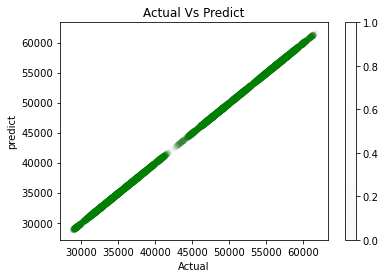

In [40]:
plt.scatter(Y_test,Y_predict, c = 'green', alpha = 0.01, cmap='Spectral')
plt.colorbar()
plt.xlabel("Actual")
plt.ylabel("predict")
plt.title("Actual Vs Predict")

In [41]:
#Predcited values difference
pred_y_df = pd.DataFrame({'Actual Value': Y_test,'Predicted Value':Y_predict, 'Difference': Y_test-Y_predict})
pred_y_df[0:20]


,Actual Value,Predicted Value,Difference
4765713,31697.336742,31700.213493,-2.876751
4804205,56922.834356,56925.963953,-3.129597
4806275,47282.380476,47266.525769,15.854707
4755474,36487.173672,36495.032802,-7.859130
4780363,38006.559893,37993.540947,13.018946
4852921,56114.265246,56095.888465,18.376781
4790693,47726.242350,47722.192439,4.049911
4747455,34593.855226,34611.034925,-17.179699
4802171,56258.798535,56251.746311,7.052224
4738648,38301.210471,38323.878824,-22.668353


In [43]:
#Model performance evaluation
#MAE
from sklearn.metrics import mean_absolute_error
print("Train:MAE",mean_absolute_error(Y_train,Y_trainpredict))
print("Test:MAE",mean_absolute_error(Y_test,Y_predict))

Train:MAE 10.616624804702052
Test:MAE 10.692481892622032


In [44]:
#RMSE
from sklearn.metrics import mean_squared_error
print("Train:RMSE",np.sqrt(mean_squared_error(Y_train,Y_trainpredict)))
print("Test:RMSE",np.sqrt(mean_squared_error(Y_test,Y_predict)))

Train:RMSE 15.665576122652237
Test:RMSE 15.743363331501957


In [45]:
#R2
from sklearn.metrics import r2_score
r2_test = r2_score(Y_train,Y_trainpredict)
print("Train R2:", r2_test)
r2_test = r2_score(Y_test,Y_predict)
print("Test R2:", r2_test)

Train R2: 0.9999972610697613
Test R2: 0.999997254576492
